# Plotting salinity, temperature, density and EKE along a section in the Irminger Sea

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.mpl.ticker as cticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
sns.set_style('dark')
from info import datadir, figdir

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Hydrographic section coordinates
data = sio.loadmat(datadir+'hydrographic_sections.mat')
lon_section = data['lon'][0]
lat_section = data['lat'][0]
dist = data['distance'][0]
depth = data['depth'][0]
Dist,Depth=np.meshgrid(dist,depth)

# Mean properties
S_mean = data['S_mean']
T_mean = data['T_mean']
sigma_mean = data['sigma_mean']
EKE_mean = data['EKE_mean']

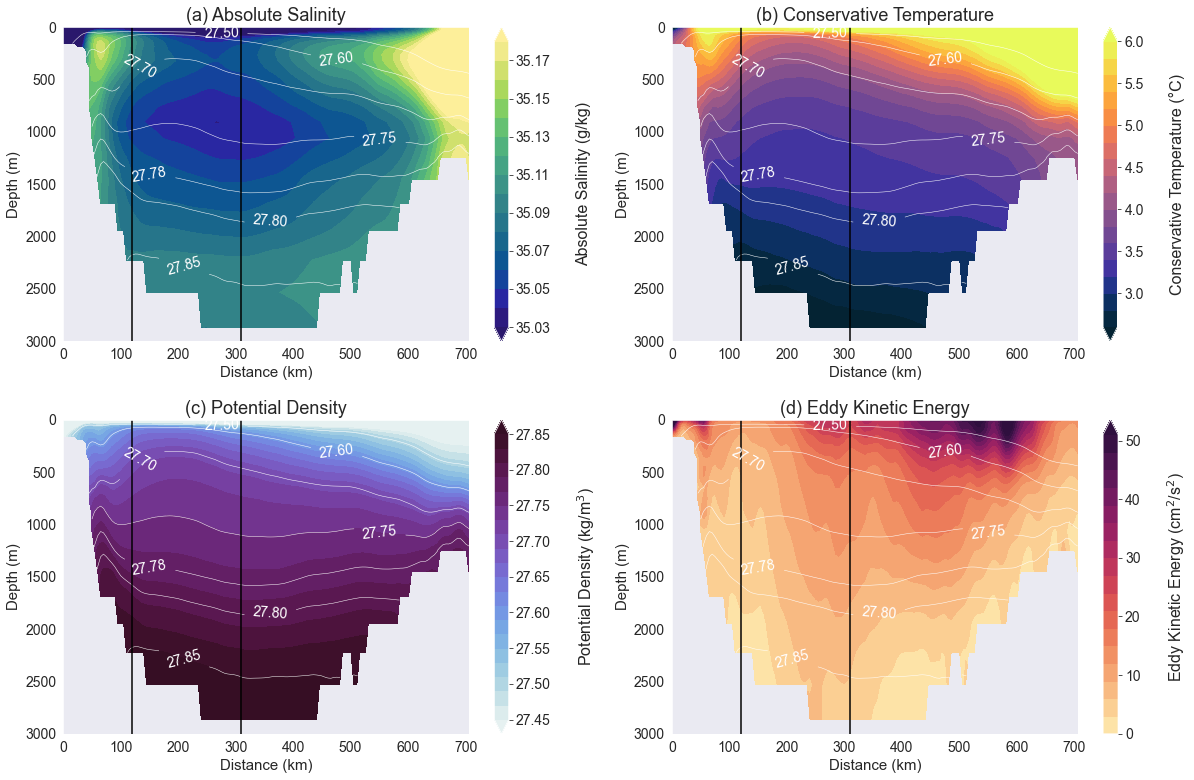

In [3]:
def plotSection(data,ax,cmap,levels,ticks,label,ext='both',inv_cbar=False):
    sectionplot = ax.contourf(Dist,Depth,data,cmap=cmap,levels=levels,extend=ext)
    cbar = plt.colorbar(sectionplot,ax=ax,ticks=ticks)
    cbar.ax.tick_params(axis='y', which='both', labelsize=14)
    cbar.ax.set_ylabel(label, fontsize=16, labelpad=25)
    if inv_cbar:
        cbar.ax.invert_yaxis()
    CS=ax.contour(Dist,Depth,sigma_mean, levels=[27.5,27.6,27.7,27.75,27.78,27.8,27.85], linewidths=0.5, colors='white')
    ax.clabel(CS, inline=1, fontsize=14, fmt='%.2f', colors='white')
    #ax.plot(dist,mld_mean,color='black')
    ax.set_xticks(np.arange(0,800e3,100e3))
    ax.set_xticklabels(np.arange(0,800,100))
    ax.set_xlabel('Distance (km)',fontsize=15)
    ax.set_ylim(0,3000)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_ylabel('Depth (m)',fontsize=15)
    ax.tick_params(axis='both',labelsize=14)
    ax.vlines([120e3,310e3],0,3000,colors='k')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,13))
plotSection(S_mean,ax1,'cmo.haline',levels=np.arange(35.03,35.19,0.01),ticks=np.arange(35.03,35.19,0.02),
            label='Absolute Salinity (g/kg)',inv_cbar=False)
ax1.set_title('(a) Absolute Salinity',fontsize=18)
plotSection(T_mean,ax2,'cmo.thermal',levels=np.arange(2.6,6.1,0.2),ticks=np.arange(3,8.1,0.5),
            label='Conservative Temperature ('+'\u00B0'+'C)')
ax2.set_title('(b) Conservative Temperature',fontsize=18)
plotSection(sigma_mean,ax3,'cmo.dense',levels=np.arange(27.45,27.86,0.02),ticks=np.arange(27.45,27.86,0.05),
            label='Potential Density (kg/m$^3$)',inv_cbar=False)
ax3.set_title('(c) Potential Density',fontsize=18)
plotSection(EKE_mean*1e4,ax4,'cmo.matter',levels=np.arange(0,52,3),ticks=np.arange(0,52,10),
            label='Eddy Kinetic Energy (cm$^2$/s$^2$)',ext='max')
ax4.set_title('(d) Eddy Kinetic Energy',fontsize=18)
plt.subplots_adjust(hspace=0.25)
plt.savefig(figdir+'hydrographic_sections.pdf',bbox_inches='tight')
plt.show()